In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [30]:
file_path = '/content/Prediction_Data.xlsx'

data = pd.read_excel(file_path, sheet_name='vw_ChurnData')

print(data.head())

# Access each sheet by its name, for example:
# df_churn = data['vw_ChurnData']
# df_join = data['vw_JoinData']


  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [31]:
# Data Processing
# Drop columns that won't be used fro prediction
data = data.drop(['Customer_ID', 'Churn_Category','Churn_Reason'], axis=1)

In [32]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned
2,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,Yes,...,Two Year,Yes,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed
3,Male,35,No,Maharashtra,10,12,NaN,Yes,No,Yes,...,Two Year,Yes,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed
4,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,Yes,...,Two Year,Yes,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed


In [33]:
data.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [34]:
# List of columns to be Label encoded
columns_to_encode = ['Gender','Married', 'State','Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method'
]

In [35]:
# Encode Ctegorical Variables except the target Variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [36]:
# Manually Encode the Target Variable
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned':1})

In [37]:
# Split data into feature and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

In [38]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Evaluating Model
# Make prediction

y_pred = rf_model.predict(X_test)

In [41]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[783  64]
 [126 229]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [42]:
# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

<ipython-input-43-eba8a8fc96b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= importances[indices], y=X.columns[indices],palette='viridis')


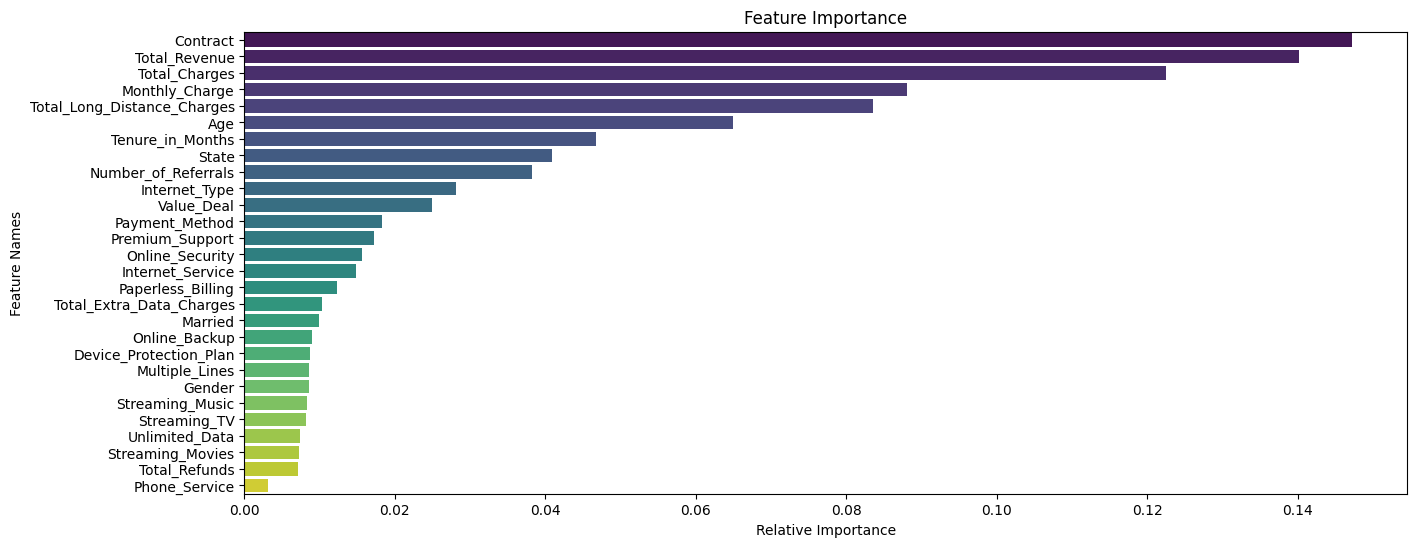

In [43]:
# plot the feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.barplot(x= importances[indices], y=X.columns[indices],palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [44]:
# predict on New Data
# Path
file_path = '/content/Prediction_Data.xlsx'

new_data = pd.read_excel(file_path, sheet_name='vw_JoinData')

print(new_data.head())


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [45]:
# Retain the original DataFrame to preserve uncoded columns
original_data = new_data.copy()

In [46]:
#Retain the customer ID column
customer_ids = new_data['Customer_ID']

In [48]:
# Drop columns
new_data = new_data.drop(['Customer_ID','Churn_Category','Churn_Reason','Customer_Status'], axis=1)

In [49]:
# Encode Categorical variable using saved Label Encoder
for column in new_data.select_dtypes(include=['object']).columns:
  new_data[column] = label_encoders[column].transform(new_data[column])

In [50]:
# Make prediction
new_data_predictions = rf_model.predict(new_data)

In [51]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_data_predictions

In [52]:
# Filter the DataFrame to include only records filtered as 'Churned'
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

In [53]:
#save the results
original_data.to_csv('/content/Predictions.csv', index=False)